# Connect to Google Drive Directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#change this code according to where the notebook or other required file (such as csv or xlsx dataset) are placed on google drive directory
cd /content/drive/My Drive/Colab Notebooks/Dicoding

/content/drive/My Drive/Colab Notebooks/Dicoding


# Import Libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from keras.preprocessing import image
from google.colab import files
%matplotlib inline

# Split Classes, Train and Test Directory

In [ ]:
#run this code once only if split-folders is not already installed 
pip install split-folders

In [ ]:
#run this code once to split classes folder
import splitfolders
in_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding/rockpaperscissors'
splitfolders.ratio(in_dir,'/content/drive/MyDrive/Colab Notebooks/Dicoding/rockpaperscissors/out' , seed=1337, ratio=(.6,.4))

Copying files: 2188 files [12:38,  2.88 files/s]


In [4]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding/rockpaperscissors/out/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding/rockpaperscissors/out/val'

# Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=45, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)



In [6]:
img_size = (100,100)
batch = 64

train_generator = train_datagen.flow_from_directory(train_dir, target_size = img_size, batch_size = batch, class_mode = 'categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size = img_size, batch_size = batch, class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Convolutional Neural Network (CNN) Model

In [8]:
keras.backend.clear_session()

# Convolution Block Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
# Fully Connection Block
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       7

# Train the CNN Model

In [9]:
history = model.fit(train_generator, steps_per_epoch=20, epochs=15, validation_data=val_generator, validation_steps=5, verbose=2)

Epoch 1/15
20/20 - 422s - loss: 1.0871 - accuracy: 0.3742 - val_loss: 1.0867 - val_accuracy: 0.3250 - 422s/epoch - 21s/step
Epoch 2/15
20/20 - 105s - loss: 1.0431 - accuracy: 0.5024 - val_loss: 1.0251 - val_accuracy: 0.5594 - 105s/epoch - 5s/step
Epoch 3/15
20/20 - 70s - loss: 0.9025 - accuracy: 0.6771 - val_loss: 0.8663 - val_accuracy: 0.6656 - 70s/epoch - 4s/step
Epoch 4/15
20/20 - 47s - loss: 0.7303 - accuracy: 0.7308 - val_loss: 0.7044 - val_accuracy: 0.7312 - 47s/epoch - 2s/step
Epoch 5/15
20/20 - 53s - loss: 0.5954 - accuracy: 0.7917 - val_loss: 0.5075 - val_accuracy: 0.8656 - 53s/epoch - 3s/step
Epoch 6/15
20/20 - 36s - loss: 0.4728 - accuracy: 0.8397 - val_loss: 0.4111 - val_accuracy: 0.8781 - 36s/epoch - 2s/step
Epoch 7/15
20/20 - 33s - loss: 0.3926 - accuracy: 0.8670 - val_loss: 0.3545 - val_accuracy: 0.9031 - 33s/epoch - 2s/step
Epoch 8/15
20/20 - 31s - loss: 0.3419 - accuracy: 0.8798 - val_loss: 0.3182 - val_accuracy: 0.8844 - 31s/epoch - 2s/step
Epoch 9/15
20/20 - 30s - lo

In [10]:
model.evaluate(train_generator)

21/21 [==============================] - 13s 590ms/step - loss: 0.2481 - accuracy: 0.9177


[0.2480960190296173, 0.917682945728302]

# Save Trained CNN Model

In [11]:
model_json = model.to_json()
with open ('image_classification.json','w') as json_file:
  json_file.write(model_json)
model.save_weights('image_classification.h5')

# Visualize Train and Validation Loss and Accuracy

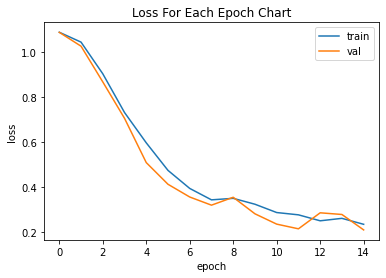

In [12]:
model_name = "image_classification"
import  matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss For Each Epoch Chart')
plt.legend(['train','val'], loc='upper right')
plt.show()

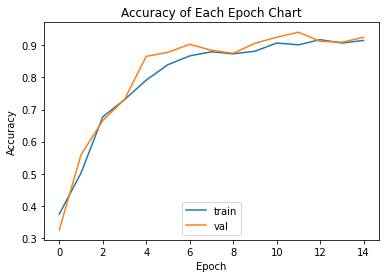

In [13]:
model_name = "image_classification"
import  matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy of Each Epoch Chart')
plt.legend(['train','val'], loc='lower center')
plt.show()

# Upload Image and Predict the Class

Saving IMG_20211010_142154.jpg to IMG_20211010_142154 (3).jpg
Saving IMG_20211010_142227.jpg to IMG_20211010_142227 (2).jpg
Saving IMG_20211010_142232.jpg to IMG_20211010_142232 (3).jpg
IMG_20211010_142154.jpg
scissor


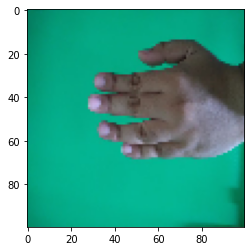

IMG_20211010_142227.jpg
scissor


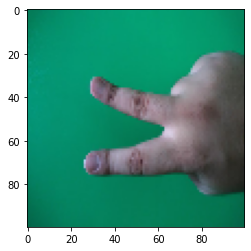

IMG_20211010_142232.jpg
rock


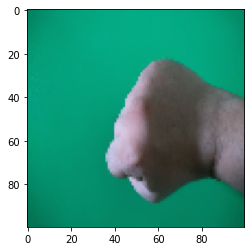

In [16]:
uploaded = files.upload()
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=img_size)
  imgplot = plt.imshow(img)
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)

  print(fn)
  if output_class==0:
    print('paper')
  elif output_class==1:
    print('rock')
  else:
    print('scissor')
  plt.show()